# Imports

In [179]:
import numpy as np
import matplotlib.pyplot as plt

## Random Numbers

The seed will help us produce random, yet reproducible results.

In [180]:
# seed = np.random.randint(0, 100)
seed = 4

rng = np.random.default_rng(seed=seed)
rng.random()


0.9430561055723676

### Generating a grid

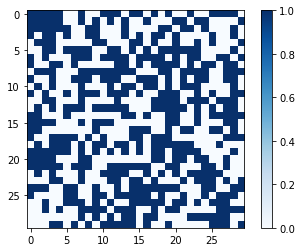

In [181]:
GRID_SIZE = 30 
MIN_GRID_VAL, MAX_GRID_VAL = 0, 1

rints = rng.integers(low=MIN_GRID_VAL, high= MAX_GRID_VAL + 1, size=(GRID_SIZE, GRID_SIZE))

plt.imshow(rints, cmap="Blues")
plt.colorbar();

It is importannt to tally the ratios given via our RNG:

In [182]:
len(rints[rints==0])/len(rints[rints==1])

0.9148936170212766

You can keep generating different grids to convince yourself this is good enough.

To simplify a lot of the mathethematics that follows, it is convenient to use a `spin-up = 1` and `spin-down = -1` convention. This will become handy, specially when calculating the net magnetization. Let's do the ratio counting one more time, but this time, using the calculation of net magnetization. 

In [183]:
rints[rints==0] = -1

rints.sum()/rints.size

0.044444444444444446

...almost zero net magnetization- exactly what we want!

## Convolution

One beautiful concept in mathematics that turns up in many applications is ***convolution***. It's mostly used in image processing to blur or sharpen images (among other things). Its also used in filtering data, for example, when you use a "rolling window" filter. 

Whenver the value of a pixel or voxel is to be weighted against its neighbours, some form of convolution is involved. Here, the magnetic spins affect each other, and we say that neighbouring spins are *"coupled"* to one another through the factor $J$. That factor will determine just how much each spin will influence its neighbour. Since only a spin value of 1 will contribute to the energy, 

will influence the total energy of the system, $E$, where

$$ E= -J \sum_{i,j} S_i S_j - B \sum_k S_k $$

when the system is exposed to an external magnetic field, $B$. 

Since each spin will influence its neighbour, the net magnetization 

...

In our case, each spin is affected by the one above/below it or adjacent to it (left/right). So our `kernel` looks like this:

In [158]:
kernel = np.array(  [0, 1]*4 + [0]) 
kernel = np.reshape(kernel, (3, -1))
kernel

array([[0, 1, 0],
       [1, 0, 1],
       [0, 1, 0]])

Or, equivilantly: 

In [160]:
kernel = kernel.astype(bool)
kernel

array([[False,  True, False],
       [ True, False,  True],
       [False,  True, False]])